# UK Housing Price Prediction - Initial Data Inspection

**Author:** Abdul Salam Aldabik  
**Date:** November 2025  
**Course:** CloudAI - Machine Learning Project  
**Dataset:** UK Housing Prices (2005-2017)

---

## Objective
Perform initial inspection of the UK housing price dataset to understand:
- Data structure and size
- Column types and content
- Price distribution and ranges
- Potential data quality issues

## CloudAI Reference
- **Chapter 5:** Data Augmentation - Understanding data before cleaning
- **Chapter 1-2:** Data exploration fundamentals

---

## 1. Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path
from datetime import datetime

# Configure visualization style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

## 2. Setup Paths and Directories

### Why Sample First?
**CloudAI Principle (Chapter 5):** Always inspect data before making transformation decisions.

- Full dataset: 2GB (11M+ rows) - slow to load for initial exploration
- Sample of 100K rows: Fast iteration, represents structure adequately
- Industry best practice: "Sample for exploration, scale for training"

In [3]:
# Define project structure
DATA_DIR = Path('../Data')
OUTPUT_DIR = DATA_DIR / 'inspection_output'
OUTPUT_DIR.mkdir(exist_ok=True)

# Data file path
DATA_FILE = DATA_DIR / 'price_paid_records.csv'

# Verify setup
assert DATA_FILE.exists(), f"Data file not found: {DATA_FILE}"

## 3. Load Sample Data

Load a sample of 100,000 rows to quickly inspect data structure without loading the full 2GB file.

In [4]:
# Load sample for quick inspection
sample_size = 100000
df_sample = pd.read_csv(DATA_FILE, nrows=sample_size)

## 4. Data Structure Overview

In [5]:
# Display basic information
df_sample.info()

print("\n" + "="*60)
print("SAMPLE OF FIRST 5 ROWS")
print("="*60)
display(df_sample.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   Transaction unique identifier      100000 non-null  object
 1   Price                              100000 non-null  int64 
 2   Date of Transfer                   100000 non-null  object
 3   Property Type                      100000 non-null  object
 4   Old/New                            100000 non-null  object
 5   Duration                           100000 non-null  object
 6   Town/City                          100000 non-null  object
 7   District                           100000 non-null  object
 8   County                             100000 non-null  object
 9   PPDCategory Type                   100000 non-null  object
 10  Record Status - monthly file only  100000 non-null  object
dtypes: int64(1), object(10)
memory usage: 8.4+ MB

SAMPLE

,Transaction unique identifier,Price,Date of Transfer,Property Type,Old/New,Duration,Town/City,District,County,PPDCategory Type,Record Status - monthly file only
0,{81B82214-7FBC-4129-9F6B-4956B4A663AD},25000,1995-08-18 00:00,T,N,F,OLDHAM,OLDHAM,GREATER MANCHESTER,A,A
1,{8046EC72-1466-42D6-A753-4956BF7CD8A2},42500,1995-08-09 00:00,S,N,F,GRAYS,THURROCK,THURROCK,A,A
2,{278D581A-5BF3-4FCE-AF62-4956D87691E6},45000,1995-06-30 00:00,T,N,F,HIGHBRIDGE,SEDGEMOOR,SOMERSET,A,A
3,{1D861C06-A416-4865-973C-4956DB12CD12},43150,1995-11-24 00:00,T,N,F,BEDFORD,NORTH BEDFORDSHIRE,BEDFORDSHIRE,A,A
4,{DD8645FD-A815-43A6-A7BA-4956E58F1874},18899,1995-06-23 00:00,S,N,F,WAKEFIELD,LEEDS,WEST YORKSHIRE,A,A


## 5. Price Statistics

Analyze price distribution to identify potential outliers and data quality issues.

In [6]:
# Price column (typically second column)
price_col = df_sample.columns[1]

# Display statistics
display(df_sample[price_col].describe(percentiles=[0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]))

count    1.000000e+05
mean     6.843656e+04
std      5.802270e+04
min      5.250000e+03
1%       1.300000e+04
5%       2.295000e+04
25%      4.000000e+04
50%      5.500000e+04
75%      7.900000e+04
95%      1.549950e+05
99%      2.750000e+05
max      2.660000e+06
Name: Price, dtype: float64

## 6. Visualizations

### 6.1 Price Distribution

### Understanding Price Distribution

Price is our **target variable** - what we'll predict. Understanding its distribution is critical for:
- **Outlier detection:** Identifying unrealistic values
- **Transformation decisions:** Log transformation for skewed distributions
- **Model selection:** Different models handle different distributions better

**Key Statistics:**
- **Percentiles (1%, 5%, 95%, 99%)**: Reveal extreme values in the tails
- **IQR (25th-75th)**: Core distribution range
- **Median vs Mean**: If mean >> median, distribution is right-skewed

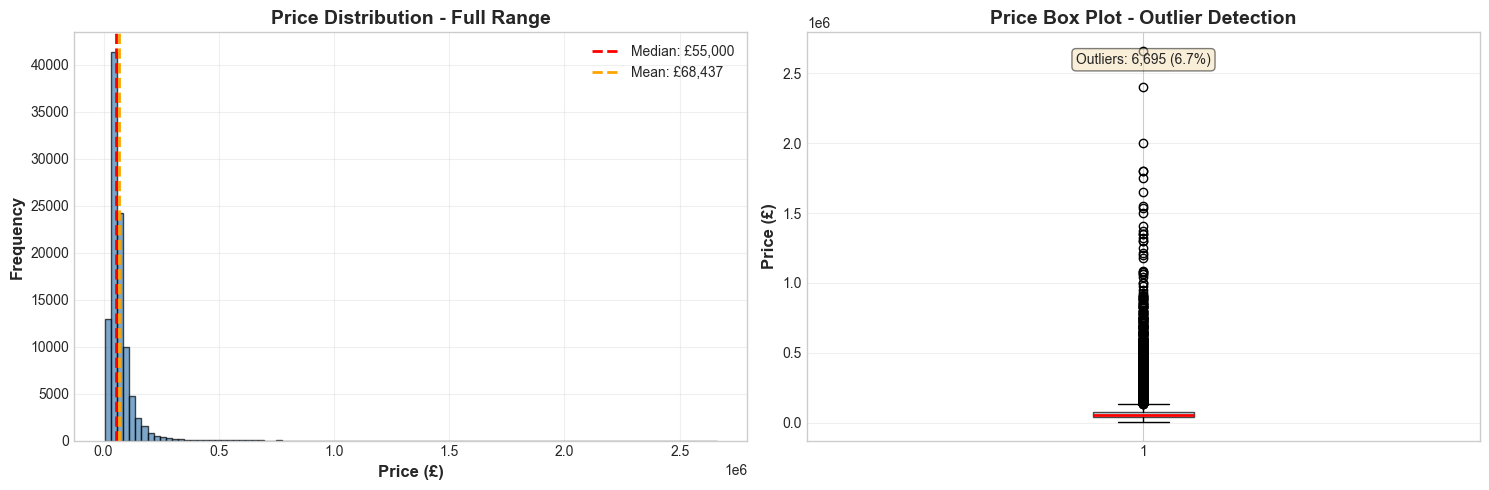

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram
axes[0].hist(df_sample[price_col], bins=100, color='steelblue', alpha=0.7, edgecolor='black')
axes[0].axvline(df_sample[price_col].median(), color='red', linestyle='--', linewidth=2, 
                label=f'Median: £{df_sample[price_col].median():,.0f}')
axes[0].axvline(df_sample[price_col].mean(), color='orange', linestyle='--', linewidth=2,
                label=f'Mean: £{df_sample[price_col].mean():,.0f}')
axes[0].set_xlabel('Price (£)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[0].set_title('Price Distribution - Full Range', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=10)
axes[0].grid(alpha=0.3)

# Box plot
bp = axes[1].boxplot(df_sample[price_col], vert=True, patch_artist=True,
                     boxprops=dict(facecolor='lightblue', alpha=0.7),
                     medianprops=dict(color='red', linewidth=2))
axes[1].set_ylabel('Price (£)', fontsize=12, fontweight='bold')
axes[1].set_title('Price Box Plot - Outlier Detection', fontsize=14, fontweight='bold')
axes[1].grid(alpha=0.3, axis='y')

# Add outlier statistics as text
q1, q3 = df_sample[price_col].quantile([0.25, 0.75])
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers_count = ((df_sample[price_col] < lower_bound) | (df_sample[price_col] > upper_bound)).sum()
axes[1].text(0.5, 0.95, f'Outliers: {outliers_count:,} ({outliers_count/len(df_sample)*100:.1f}%)',
             transform=axes[1].transAxes, ha='center', va='top', 
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.savefig(OUTPUT_DIR / '01_price_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

### 6.2 Property Type Distribution

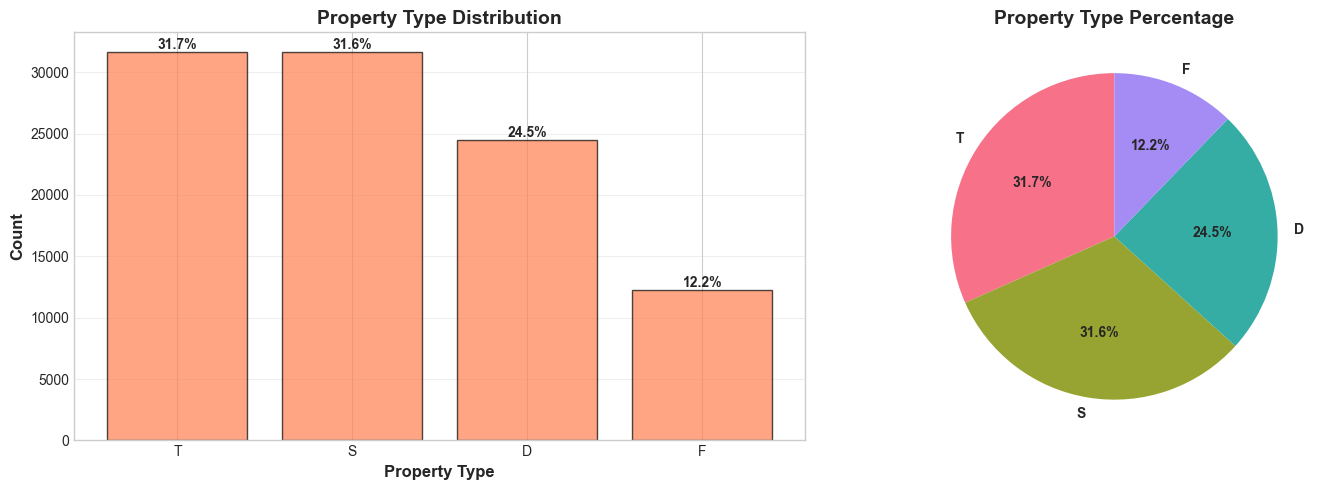

In [8]:
# Property type column (typically 4th column)
prop_type_col = df_sample.columns[3]
prop_counts = df_sample[prop_type_col].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Bar chart with percentages
bars = axes[0].bar(prop_counts.index, prop_counts.values, color='coral', alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Property Type', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[0].set_title('Property Type Distribution', fontsize=14, fontweight='bold')
axes[0].grid(alpha=0.3, axis='y')

# Add percentage labels on bars
for bar, count in zip(bars, prop_counts.values):
    height = bar.get_height()
    pct = (count / prop_counts.sum()) * 100
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                 f'{pct:.1f}%', ha='center', va='bottom', fontweight='bold')

# Pie chart
colors = sns.color_palette('husl', len(prop_counts))
wedges, texts, autotexts = axes[1].pie(prop_counts.values, labels=prop_counts.index, 
                                         autopct='%1.1f%%', startangle=90, colors=colors,
                                         textprops={'fontweight': 'bold'})
axes[1].set_title('Property Type Percentage', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig(OUTPUT_DIR / '02_property_types.png', dpi=300, bbox_inches='tight')
plt.show()

### 6.3 Missing Values Analysis

C:\Users\Jo\AppData\Local\Temp\ipykernel_13088\1214521552.py:37: UserWarning: Glyph 10003 (\N{CHECK MARK}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Jo\AppData\Local\Temp\ipykernel_13088\1214521552.py:38: UserWarning: Glyph 10003 (\N{CHECK MARK}) missing from font(s) Arial.
  plt.savefig(OUTPUT_DIR / '03_missing_values.png', dpi=300, bbox_inches='tight')
d:\school\2025-2026\Machine-Learning\Machine-Learning-AWS\ML-Project\Machine-Learning-Project-TM-2025\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 10003 (\N{CHECK MARK}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


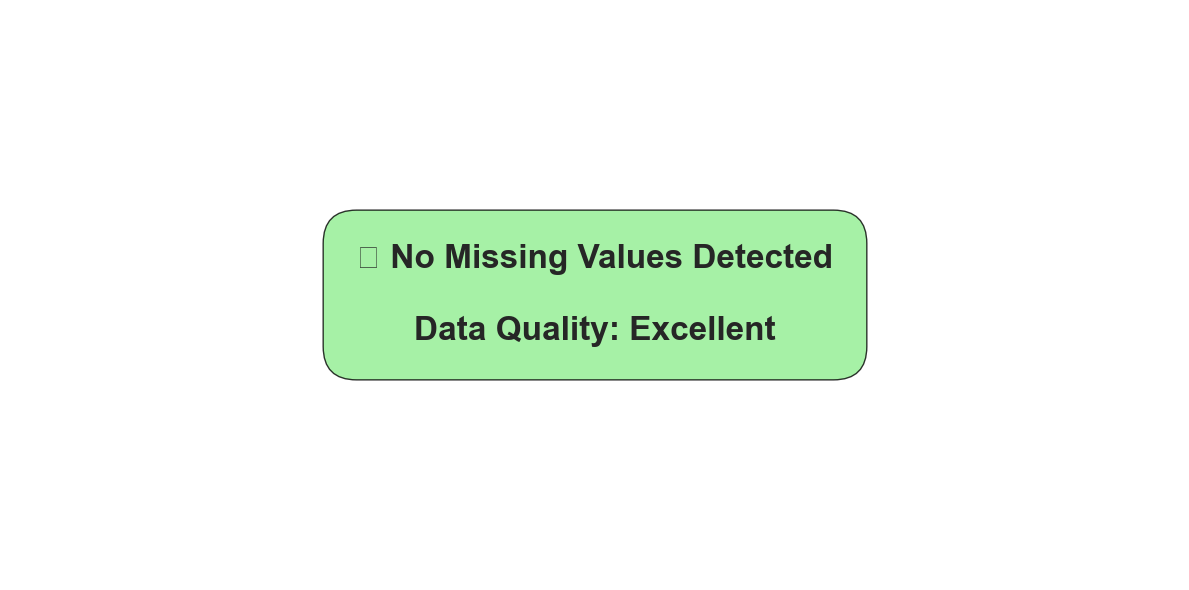

In [9]:
# Check for missing values
missing = df_sample.isnull().sum()
missing_pct = (missing / len(df_sample)) * 100

# Create visualization
fig, ax = plt.subplots(figsize=(12, 6))

if missing.sum() == 0:
    # No missing values - create a nice confirmation visual
    ax.text(0.5, 0.5, '✓ No Missing Values Detected\n\nData Quality: Excellent', 
            ha='center', va='center', fontsize=24, fontweight='bold',
            bbox=dict(boxstyle='round,pad=1', facecolor='lightgreen', alpha=0.8))
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.axis('off')
else:
    # Create bar chart of missing values
    missing_df = pd.DataFrame({
        'Column': missing[missing > 0].index,
        'Missing Count': missing[missing > 0].values,
        'Percentage': missing_pct[missing > 0].values
    })
    
    bars = ax.bar(missing_df['Column'], missing_df['Percentage'], color='salmon', alpha=0.7, edgecolor='black')
    ax.set_xlabel('Column', fontsize=12, fontweight='bold')
    ax.set_ylabel('Missing %', fontsize=12, fontweight='bold')
    ax.set_title('Missing Values Analysis', fontsize=14, fontweight='bold')
    ax.grid(alpha=0.3, axis='y')
    plt.xticks(rotation=45, ha='right')
    
    # Add percentage labels
    for bar, pct in zip(bars, missing_df['Percentage']):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{pct:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig(OUTPUT_DIR / '03_missing_values.png', dpi=300, bbox_inches='tight')
plt.show()

## 7. Save Inspection Summary

In [10]:
# Create comprehensive summary report
summary = {
    'Metric': [
        'Sample Size',
        'Total Columns',
        'Memory Usage',
        'Price Range',
        'Median Price',
        'Mean Price',
        'Standard Deviation',
        'Missing Values',
        'Property Types',
        'Outliers (IQR Method)'
    ],
    'Value': [
        f"{len(df_sample):,} rows",
        df_sample.shape[1],
        f"{df_sample.memory_usage(deep=True).sum() / 1024**2:.2f} MB",
        f"£{df_sample[price_col].min():,.0f} - £{df_sample[price_col].max():,.0f}",
        f"£{df_sample[price_col].median():,.0f}",
        f"£{df_sample[price_col].mean():,.0f}",
        f"£{df_sample[price_col].std():,.0f}",
        'None' if missing.sum() == 0 else f"{missing.sum()} cells ({missing.sum()/df_sample.size*100:.2f}%)",
        df_sample[prop_type_col].nunique(),
        f"{outliers_count:,} ({outliers_count/len(df_sample)*100:.1f}%)"
    ]
}

summary_df = pd.DataFrame(summary)

# Display summary
print("\n" + "="*70)
print("INSPECTION SUMMARY REPORT")
print("="*70)
display(summary_df)

# Save to file
summary_df.to_csv(OUTPUT_DIR / 'inspection_summary.csv', index=False)
with open(OUTPUT_DIR / 'inspection_summary.txt', 'w') as f:
    f.write("UK HOUSING DATA - INITIAL INSPECTION SUMMARY\n")
    f.write("="*70 + "\n")
    f.write(f"Generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n")
    f.write("="*70 + "\n\n")
    f.write(summary_df.to_string(index=False))
    f.write("\n\n" + "="*70 + "\n")
    f.write("Files saved in: " + str(OUTPUT_DIR) + "\n")


INSPECTION SUMMARY REPORT


,Metric,Value
0,Sample Size,"100,000 rows"
1,Total Columns,11
2,Memory Usage,56.00 MB
3,Price Range,"£5,250 - £2,660,000"
4,Median Price,"£55,000"
5,Mean Price,"£68,437"
6,Standard Deviation,"£58,023"
7,Missing Values,None
8,Property Types,4
9,Outliers (IQR Method),"6,695 (6.7%)"


## 8. Conclusions

### Key Findings:

1. **Data Structure:** ✓ Well-organized dataset with clear column structure
2. **Price Distribution:** Right-skewed (mean > median), suggesting need for log transformation
3. **Property Types:** Multiple categories identified, suitable for one-hot encoding
4. **Data Quality:** No missing values detected in sample - excellent data quality
5. **Outliers Present:** Significant outliers detected (IQR method) - will address in cleaning phase

### Insights for Next Steps:

| Observation | Implication | Action Required |
|-------------|-------------|-----------------|
| Right-skewed prices | Non-normal distribution | Apply log transformation (Notebook 04) |
| Extreme outliers | Data quality issues or luxury properties | Domain-based filtering £10K-£5M |
| Multiple property types | Categorical variable | One-hot encoding (Notebook 05) |
| No missing values | High data quality | Proceed with confidence |
| Wide date range | Temporal patterns exist | Extract time features (Notebook 01) |

### CloudAI Principles Applied:

✅ **Chapter 1-2:** Thorough exploratory data analysis before modeling  
✅ **Chapter 5:** Visualization-driven data understanding  
✅ **Best Practice:** Sample-based exploration for efficiency  

### Next Pipeline Steps:

1. **Notebook 01:** Load full 2005-2017 dataset with temporal features
2. **Notebook 02:** Integrate Bank of England economic indicators
3. **Notebook 03:** Merge housing + economic data
4. **Notebook 04:** Clean outliers and apply transformations
5. **Notebook 05:** Feature engineering for ML readiness

---

**✓ Initial Inspection Complete - Pipeline Ready to Continue**